In [111]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt  
from timeit import timeit
%matplotlib inline

In [73]:
# создать матрицу А (n*n) из упор. целых чисел от 0 до n^2, так чтобы при изменении n оно генерировалось быстрее чем n секунд 
# def square_matrix(n: int):
#     matrix = [[x + y * n for x in range(n)] for y in range(n)] 
#     return matrix

square_matrix = lambda n: [[x + y * n for x in range(n)] for y in range(n)] 

In [101]:
# %%timeit
result = %timeit -o square_matrix(5)

15.3 µs ± 475 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [100]:
print(result)
print(result.average)

15.7 µs ± 1.34 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
1.5682454285732614e-05


In [ ]:
посчитать среднее значение матрицы, транспонировать, квадрат матрицы, 
получить SVD разложение матрицы
написать для тестов генератор случайных матриц заданного размера

In [75]:
s = 'square_matrix(n)'
timeit(stmt=s, setup=f'n={10}', globals=globals())/

42.631807899999785

In [81]:
def my_timeit(stmt, setup, n):
    return timeit(stmt=stmt, setup=setup, number=n, globals=globals())/n

In [105]:
%%time
my_timeit(s, f'n={10}', 100000)

Wall time: 4.4 s


4.401963199999955e-05

In [107]:
times = []
for i in range(15):
    times.append(my_timeit(s, f'n={i}', int(10e+5)))
    print(f'i = {i}')

i = 0
i = 1
i = 2
i = 3
i = 4
i = 5
i = 6
i = 7
i = 8
i = 9
i = 10
i = 11
i = 12
i = 13
i = 14


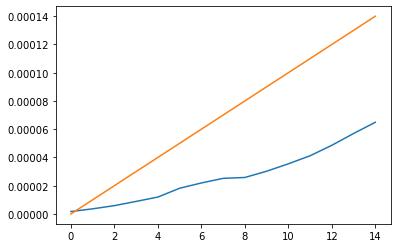

In [114]:
plt.plot(times)
plt.plot([i * 1e-5 for i in range(15)])

In [116]:
all_data = pd.read_csv('../data/forest/forest_dataset.csv')
all_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
0,2683,333,35,30,26,2743,121,173,179,6572,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2
1,2915,90,8,216,11,4433,232,228,129,4019,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2,2941,162,7,698,76,2783,227,242,148,1784,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,3096,60,17,170,3,3303,231,202,99,5370,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
4,2999,66,8,488,37,1532,228,225,131,2290,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2


In [118]:
delayed_data = all_data[int(0.8 * len(all_data)):]
all_data = df[:int(0.8 * len(all_data))]

In [119]:
labels = all_data[all_data.columns[-1]].values
feature_matrix = all_data[all_data.columns[:-1]].values

delayed_labels = delayed_data[delayed_data.columns[-1]].values
delayed_feature_matrix = delayed_data[delayed_data.columns[:-1]].values

In [120]:
labels

array([2, 1, 2, ..., 2, 6, 1], dtype=int64)

In [121]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score


In [122]:
two_class_labels_indices = (labels == 1) + (labels == 2)

two_class_feature_matrix = feature_matrix[two_class_labels_indices]
two_class_labels = labels[two_class_labels_indices]



In [163]:
qualitive_two_class_feature_matrix = two_class_feature_matrix[:, 10:]
qualitive_two_class_labels = two_class_labels

quantitive_two_class_feature_matrix = two_class_feature_matrix[:, :10]
quantitive_two_class_labels = two_class_labels

In [164]:
my_pipe(qualitive_two_class_feature_matrix, qualitive_two_class_labels)

Точность работы алгоритма (SVM) на обучающей выборке: 0.6942013129102844
Точность классификации: 0.68
Точность (способность классификатора не отмечать один класс другим): 0.69
Полнота (отзыв, способность классификатора отмечать все объекты одного класса): 0.48
F-мера (средневзвешенное значение точности и полноты): 0.56


In [165]:
my_pipe(quantitive_two_class_feature_matrix, quantitive_two_class_labels)

Точность работы алгоритма (SVM) на обучающей выборке: 0.7983223924142961
Точность классификации: 0.79
Точность (способность классификатора не отмечать один класс другим): 0.75
Полнота (отзыв, способность классификатора отмечать все объекты одного класса): 0.76
F-мера (средневзвешенное значение точности и полноты): 0.76


In [123]:
two_class_labels_indices

array([ True,  True,  True, ...,  True, False,  True])

In [124]:
two_class_feature_matrix

array([[2683,  333,   35, ...,    0,    0,    0],
       [2915,   90,    8, ...,    0,    0,    0],
       [2941,  162,    7, ...,    0,    0,    0],
       ...,
       [2781,  334,   18, ...,    0,    0,    0],
       [2509,   88,    9, ...,    0,    0,    0],
       [3061,  198,    3, ...,    0,    0,    0]], dtype=int64)

In [125]:
two_class_feature_matrix.shape

(6856, 54)

In [126]:
all_data.shape

(8000, 55)

In [129]:
np.unique(labels)

array([1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [130]:
train_feature_matrix, test_feature_matrix, train_labels, test_labels = train_test_split(two_class_feature_matrix, 
                                                                                        two_class_labels, test_size=0.2, random_state=0)



In [132]:
df = pd.DataFrame(two_class_feature_matrix)

In [133]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53
0,2683,333,35,30,26,2743,121,173,179,6572,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,2915,90,8,216,11,4433,232,228,129,4019,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,2941,162,7,698,76,2783,227,242,148,1784,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3096,60,17,170,3,3303,231,202,99,5370,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,2999,66,8,488,37,1532,228,225,131,2290,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


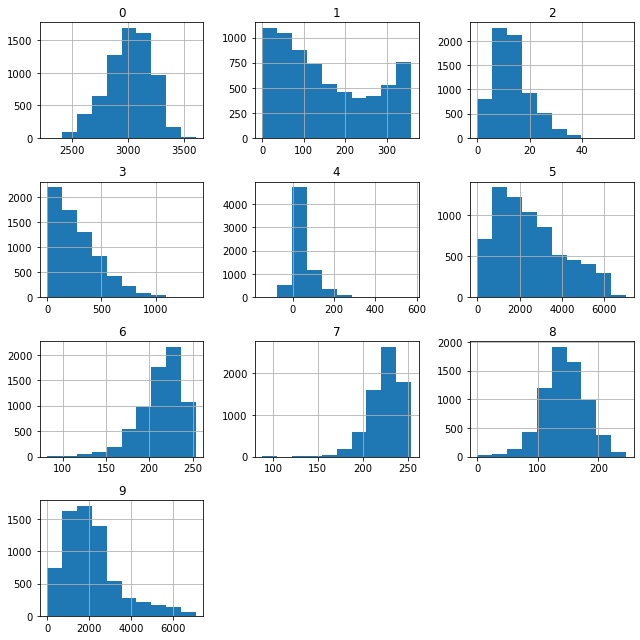

In [136]:
df.iloc[:, 0:10].hist(figsize=(9,9))
plt.tight_layout()

In [145]:
from sklearn.metrics import confusion_matrix # для вычисления матрицы неточности
from sklearn.metrics import accuracy_score # для вычисления точности предсказывания
from sklearn.metrics import precision_score, recall_score, f1_score # для вычисления метрик (точность, полнота, F-мера и т.д.)
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve

def compute_metrics(y_test, y_pred=None, method=None, x_test=None):
  # применение модели на тестовой выборке
  if y_pred is None:
    y_pred = method.predict(x_test)

  # вычисление матрицы ошибок по векторам реальных результатом и 
  # результатов, данных моделью на тестовой выборке
  cfn_matrix = confusion_matrix(y_test, y_pred)

  # оценка точности классификации моделью персептрона
  accuracy = accuracy_score(y_test, y_pred)

  # вычисление точности (precision = TP / (TP + FP))
  precision = precision_score(y_test, y_pred)

  # вычисление полноты (recall = TP / (TP + FN))
  recall = recall_score(y_test, y_pred)

  # вычисление F-меры - средней гармонической precision и recall: 
  # F1 = 2 * (precision * recall) / (precision + recall)
  f1 = f1_score(y_test, y_pred)

  print('Точность классификации: %0.2f' % (accuracy))
  print('Точность (способность классификатора не отмечать один класс другим): %0.2f' % (precision))
  print('Полнота (отзыв, способность классификатора отмечать все объекты одного класса): %0.2f' % (recall))      
  print('F-мера (средневзвешенное значение точности и полноты): %0.2f' % (f1))

  # возвращаем матрицу ошибок
  return {'confusion_matrix': cfn_matrix, 'accuracy': accuracy, 
          'precision': precision, 'recall': recall, 'f1': f1}

In [146]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Perceptron


# создание и настройка модели
clf_perceptron = make_pipeline(StandardScaler(), 
                               Perceptron(tol=1e-3, random_state=0))

# обучение модели
clf_perceptron.fit(train_feature_matrix, train_labels)
train_score = clf_perceptron.score(train_feature_matrix, train_labels)
print(f'Точность работы алгоритма (Perceptron) на обучающей выборке: {train_score}')



Точность работы алгоритма (Perceptron) на обучающей выборке: 0.6808898614150255


In [147]:
metrix = compute_metrics(test_labels, method=clf_perceptron, x_test=test_feature_matrix)

Точность классификации: 0.67
Точность (способность классификатора не отмечать один класс другим): 0.60
Полнота (отзыв, способность классификатора отмечать все объекты одного класса): 0.69
F-мера (средневзвешенное значение точности и полноты): 0.64


In [160]:
from sklearn.svm import SVC 

def my_pipe(features, labels):
    train_feature_matrix, test_feature_matrix, train_labels, test_labels = train_test_split(features, 
                                                                                            labels, test_size=0.2, random_state=0)
 
    # создание и настройка модели SVM
    clf_svm = make_pipeline(StandardScaler(), 
                            SVC())
    # обучение модели
    clf_svm.fit(train_feature_matrix, train_labels)

    # точность работы на обучающей выборке
    train_score = clf_svm.score(train_feature_matrix, train_labels)
    print(f'Точность работы алгоритма (SVM) на обучающей выборке: {train_score}')
    
    metrix = compute_metrics(test_labels, method=clf_svm, x_test=test_feature_matrix)

In [154]:
metrix = compute_metrics(test_labels, method=clf_svm, x_test=test_feature_matrix)

Точность классификации: 0.79
Точность (способность классификатора не отмечать один класс другим): 0.76
Полнота (отзыв, способность классификатора отмечать все объекты одного класса): 0.75
F-мера (средневзвешенное значение точности и полноты): 0.76
